#### Changes to make
##### Required
* replace _rand_indices with function that uses ROI to randomly select from valid indices
##### Desired
* check list of accepted openslide formats before adding files to list

In [10]:
import tensorflow as tf
from openslide import open_slide
from os import listdir
from os.path import isfile, join
from random import randint

import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
class SlideLoader:
    def __init__(self, crop_dims=(512, 512), data_dir='.'):
        self.data_dir = data_dir
        self.crop_dims = crop_dims
        self.files = [f for f in listdir(data_dir) if isfile(join(data_dir, f))]
        
    def _filepath(self, file_idx):
        return join(self.data_dir, self.files[file_idx])
    
    def _rand_indices(self, slide):
        dims = slide.dimensions
        upper_bounds = (dims[0] - self.crop_dims[0] - 1, dims[1] - self.crop_dims[1] - 1)
        return (randint(0, upper_bounds[0]), randint(0, upper_bounds[1]))
    
    def get_crop_batch(self, n_crops):
        crops = []
        sample_idxs = [randint(0, len(self.files) - 1) for _ in range(n_crops)]
        for i in sample_idxs:
            slide = open_slide(self._filepath(i))
            crop = slide.read_region(self._rand_indices(slide), 0, self.crop_dims)
            crops.append(crop)
            
        return crops

('Number of crops: %d', 5)


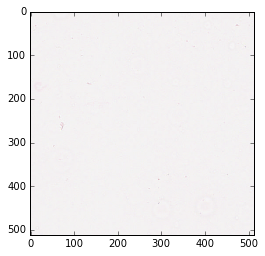

In [29]:
m = SlideLoader(data_dir='../Data/Myositis/')
imgs = m.get_crop_batch(5)
print("Number of crops: %d" % len(imgs))
plt.imshow(imgs[0])